<a href="https://colab.research.google.com/github/duc-ke/study_isg_deeplearning/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  STEP1 : 데이터 읽어 그래프 표시해 보기

#### numpy로 데이터 읽어 그래프 그리기
![123123123.PNG](attachment:123123123.PNG)

In [0]:
# 트레이닝 데이터 가져오기
train = np.loadtxt('E:/heigh_weight.csv', delimiter=',', skiprows=1)
train

array([[170.,  70.],
       [168.,  66.],
       [177.,  73.],
       [181.,  77.],
       [172.,  74.],
       [171.,  73.],
       [169.,  69.],
       [175.,  79.],
       [174.,  77.],
       [178.,  80.],
       [170.,  74.],
       [167.,  68.],
       [177.,  71.],
       [182., 276.],
       [173.,  78.],
       [171.,  72.],
       [170.,  68.],
       [179.,  79.],
       [175.,  77.],
       [177.,  81.],
       [186.,  84.],
       [166.,  73.],
       [183.,  78.],
       [168.,  69.]])

In [0]:
train_x = train[:, 0]
train_y = train[:, 1]
train_x, train_y

In [0]:
num_of_amples = train_x.shape[0]
num_of_amples 

24

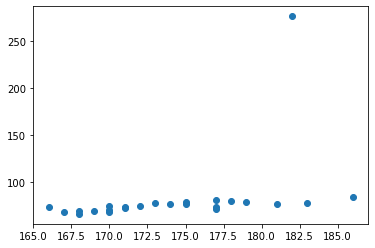

In [0]:
# dot 그래프를 그린다.
plt.plot(train_x, train_y, 'o')
plt.show()

### STEP2 : 구현 함수 준비 단계
#### STEP2-1 : hypothesis 함수 구현하기 (y=wx+b)

In [0]:
# weight값 초기화 (임의의 쓰레기 값)
weight0 = np.random.rand()
weight1 = np.random.rand()
(weight0, weight1)

(0.12975739249865204, 0.215026112986619)

In [0]:
#hypothesis 함수
def f(x):
    return weight0 + weight1*x

#### STEP2-2 : cost func 구현(비용,손실함수)

최소자승법(Least Square Method)을 잘 이용하려면 최소자승법의 한계도 잘 알고 있어야 할 것이다. 최소자승법은 데이터 중에 보통 outlier(정상적인 데이터 분포에서 동떨어진 데이터)라고 불리는 이상한 놈이 하나라도 끼어 있으면 적용하기 힘든 방법이다.

In [0]:
# Least square(최소자승법)
#def E(x, y):
#    return 0.5 * np.sum((y - f(x)) ** 2)

# MSE (평균제곱오차)
def E(x, y):
    return 1/num_of_amples * np.sum((y-f(x))**2)

# CEE(교차엔트로피)    
#def E(x, y):
#    delta = 1e-10
#    return -np.sum(f(x)*np.log(y+delta))
 

#### STEP2-3 : z-score 변환(정규화 = 표준화) 구현
전처리는 절대적인것은 아니지만 이것을 하면 매개변수가 빨리 수렴하게 됨.

평균을 0으로, 분산을 1로 변환하는 것

In [0]:
mu = train_x.mean() # 평균
sigma = train_x.std() # 표준편차(제곱근으로 줄인)

def z_score(x):
    return (x - mu) / sigma

train_z = z_score(train_x)
print('변환 전: ', train_x)
print('변환 후: ', train_z)

변환 전:  [170. 168. 177. 181. 172. 171. 169. 175. 174. 178. 170. 167. 177. 182.
 173. 171. 170. 179. 175. 177. 186. 166. 183. 168.]
변환 후:  [-0.77008414 -1.14345827  0.53672531  1.28347357 -0.39671001 -0.58339708
 -0.95677121  0.16335118 -0.02333588  0.72341238 -0.77008414 -1.33014534
  0.53672531  1.47016064 -0.21002295 -0.58339708 -0.77008414  0.91009944
  0.16335118  0.53672531  2.2169089  -1.5168324   1.6568477  -1.14345827]


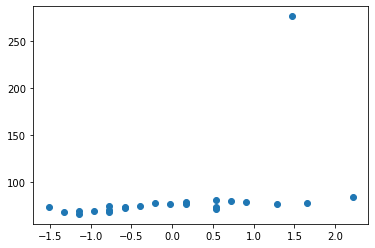

In [0]:
plt.plot(train_z, train_y, 'o')
plt.show()

#### STEP2-4 : 학습하지 않은 weight를 이용한 추정 선 그래프

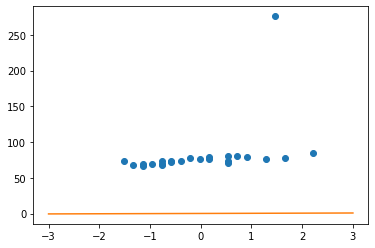

In [0]:
x = np.linspace(-3, 3, 100)    # 균일 x 생성

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

#### STEP2-5 :  optimizer 구현 (Gradient Descent:경사하강법)

In [0]:
# learning rate
lr = 0.01

# Cost의 차분(이전 오차와의 차이)
diff = 1

count = 0
error = E(train_z, train_y)

while diff > 1e-2:
    
    # opimizer - GD(경사하강법)
    weight0 = weight0 - lr *1/num_of_amples  * np.sum((f(train_z) - train_y))
    weight1 = weight1 - lr *1/num_of_amples * np.sum((f(train_z) - train_y) * train_z)
    
    new_error = E(train_z, train_y)
    diff = error - new_error
    error = new_error
    
    count += 1

    print('{}: w1 = {:.3f}, w0 = {:.3f}, error = {:.3f}, diff = {:.3f}'
          .format(count, weight1, weight0, error, diff))


1: w1 = 0.371, w0 = 0.956, error = 8323.624, diff = 140.671
2: w1 = 0.525, w0 = 1.774, error = 8185.753, diff = 137.871
3: w1 = 0.678, w0 = 2.584, error = 8050.625, diff = 135.128
4: w1 = 0.829, w0 = 3.385, error = 7918.186, diff = 132.439
5: w1 = 0.979, w0 = 4.179, error = 7788.383, diff = 129.803
6: w1 = 1.127, w0 = 4.965, error = 7661.163, diff = 127.220
7: w1 = 1.274, w0 = 5.743, error = 7536.474, diff = 124.688
8: w1 = 1.419, w0 = 6.513, error = 7414.267, diff = 122.207
9: w1 = 1.563, w0 = 7.275, error = 7294.492, diff = 119.775
10: w1 = 1.705, w0 = 8.030, error = 7177.100, diff = 117.392
11: w1 = 1.846, w0 = 8.777, error = 7062.044, diff = 115.056
12: w1 = 1.985, w0 = 9.517, error = 6949.278, diff = 112.766
13: w1 = 2.123, w0 = 10.249, error = 6838.756, diff = 110.522
14: w1 = 2.260, w0 = 10.974, error = 6730.434, diff = 108.323
15: w1 = 2.396, w0 = 11.692, error = 6624.267, diff = 106.167
16: w1 = 2.530, w0 = 12.402, error = 6520.212, diff = 104.054
17: w1 = 2.662, w0 = 13.106, 

#### STEP2-6 :  추정 회귀 선

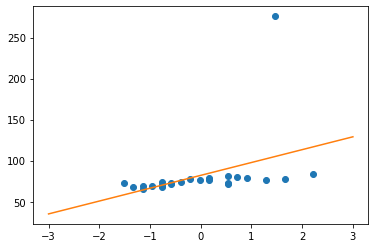

In [0]:
x = np.linspace(-3, 3, 100)    # 균일 x 생성

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

## STEP3 : 선형회귀 함구 구현(종합)
지금까지의 연습했던 기능들을 이용하여 구현


In [0]:
# gif 그래프 만드는 라이브러리
!pip install celluloid

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import celluloid
from IPython.display import HTML

#### STEP3-1 : 선형회귀 함구 구현(학습 시키기 전)

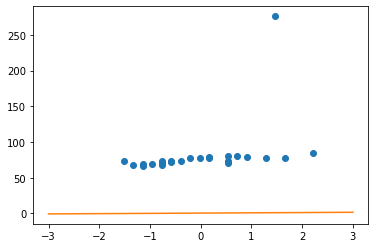

In [0]:
train = np.loadtxt('E:/heigh_weight.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

# weight값 초기화 (임의의 쓰레기 값)
weight0 = np.random.rand()
weight1 = np.random.rand()


def f(x):
    return weight0 + weight1*x


# Least square(최소자승법)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)


mu = train_x.mean()
sigma = train_x.std()


def z_score(x):
    return (x - mu) / sigma

x = np.linspace(-3, 3, 100)  

train_z = z_score(train_x)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

#### STEP3-2 : 선형회귀 함구 구현(학습 과정 최종)

1: w1 = 4.081, w0 = 20.183, error = 65367.601, diff = 35557.863
2: w1 = 6.893, w0 = 35.199, error = 44829.379, diff = 20538.222
3: w1 = 9.030, w0 = 46.611, error = 32966.502, diff = 11862.877
4: w1 = 10.654, w0 = 55.285, error = 26114.504, diff = 6851.998
5: w1 = 11.888, w0 = 61.876, error = 22156.791, diff = 3957.714
6: w1 = 12.826, w0 = 66.886, error = 19870.815, diff = 2285.976
7: w1 = 13.539, w0 = 70.693, error = 18550.436, diff = 1320.379
8: w1 = 14.081, w0 = 73.587, error = 17787.784, diff = 762.651
9: w1 = 14.492, w0 = 75.786, error = 17347.277, diff = 440.507
10: w1 = 14.805, w0 = 77.457, error = 17092.840, diff = 254.437
11: w1 = 15.043, w0 = 78.728, error = 16945.877, diff = 146.963
12: w1 = 15.224, w0 = 79.693, error = 16860.991, diff = 84.886
13: w1 = 15.361, w0 = 80.427, error = 16811.961, diff = 49.030
14: w1 = 15.466, w0 = 80.984, error = 16783.642, diff = 28.320
15: w1 = 15.545, w0 = 81.408, error = 16767.284, diff = 16.357
16: w1 = 15.605, w0 = 81.730, error = 16757.83

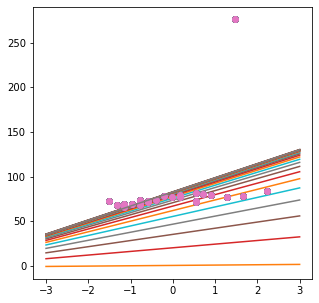

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# ax.set_ylim(min(train_y)-5, max(train_y)+5)
# celluloid.Camera On!
camera = celluloid.Camera(fig)  

# learning rate
lr = 0.01


# Cost의 차분(이전 오차와의 차이)
diff = 1

count = 0
error = E(train_z, train_y)

x = np.linspace(-3, 3, 100)    # 균일 x 생성
while diff > 1e-2:
        
    ax = plt.plot(train_z, train_y, 'o')
    ax = plt.plot(x, f(x))
    # 찰칵
    camera.snap()
    
    
    # opimizer - GD
    weight0 = weight0 - lr * np.sum((f(train_z) - train_y))
    weight1 = weight1 - lr * np.sum((f(train_z) - train_y) * train_z)
    
    new_error = E(train_z, train_y)
    diff = error - new_error
    error = new_error
    
    count += 1
    print('{}: w1 = {:.3f}, w0 = {:.3f}, error = {:.3f}, diff = {:.3f}' # 소수점 3자리까지 표현 포멧
          .format(count, weight1, weight0, error, diff))

### STEP4 : 최적화 과정 살펴보기(GIF를이용한)

In [0]:
# for loop이 종료되고나서 camera 인스턴스의 animate함수를 이용해서 이어붙이기
animation = camera.animate(interval=120, blit=True)

# jupyter에서 gif 보여주기
HTML(animation.to_html5_video())

### STEP5 : 최적화과정 GIF 저장 

In [0]:
# .mp4 파일로 저장
animation.save(
    'regression_ML.mp4',
    dpi=100,
    savefig_kwargs={
        'frameon': False,
        'pad_inches': 'tight'
    }
)